In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [18]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [19]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [72]:
len(df)

155

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

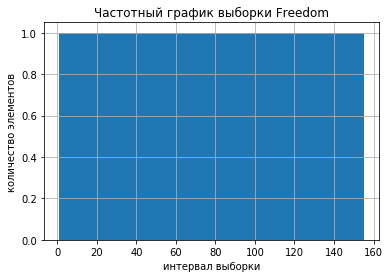

In [70]:
plt.hist(df['Freedom'],155)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Freedom')
plt.grid(True)
plt.show()

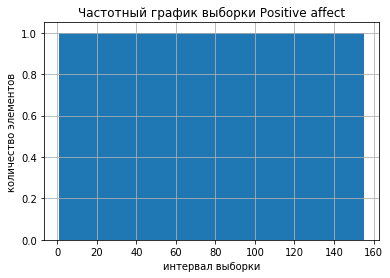

In [79]:
plt.hist(df['Positive affect'],155)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Positive affect')
plt.grid(True)
plt.show()

### Посмотрела распределения при разном разбиении интервалов,  оба распределения это равномерные распределения.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [36]:
df.loc[df.Freedom.isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [37]:
#Выбросим пустое значение, чтобы статистики нормально считались
df = df.loc[~df.Freedom.isnull()]

In [38]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  78.0


In [40]:
print('Значение моды: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 155 equally common values

In [39]:
print('Математическое ожидание', statistics.mean(df['Freedom']))

Математическое ожидание 78.0


In [53]:
print('Стандартное отклонение ', statistics.pstdev(df['Freedom']))

Стандартное отклонение  44.74371464239419


In [54]:
print('Дисперсия ', statistics.pvariance(df['Freedom']))

Дисперсия  2002.0


In [41]:
print('Минимум: ', min(df['Freedom']))

Минимум:  1.0


In [42]:
print('Максимум: ', max(df['Freedom']))

Максимум:  155.0


Выброс мы нашли в начале расчета статистик - пустое значение в колонке. Посмотрим есть ли значения сильно отличающиеся от средних.

In [51]:
df.loc[df.Freedom > 150]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
121,Mauritania,122,68,94.0,58.0,99.0,151.0,67.0,148.0,117.0,120.0
146,Haiti,147,111,142.0,119.0,146.0,152.0,48.0,20.0,138.0,125.0
148,Syria,149,137,155.0,155.0,154.0,153.0,38.0,69.0,NaN,128.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


In [52]:
print('Размах: ', max(df['Freedom']) - min(df['Freedom']))

Размах:  154.0


Почему нельзя найти моду?

Мода показывает самое часто встречающееся значение. У нас данные такие что есть 155 значений, которые встречаются одинаково часто, т.е. по одному разу.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

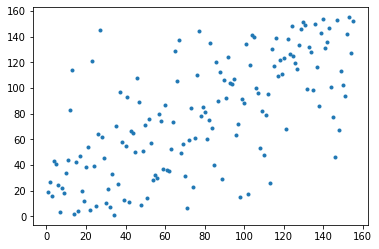

In [73]:
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')

In [75]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6817698430601657


### В лекции было написано, что обе с.в. должны быть распределены нормально, но они распределены равномерно.  Коэффициент считать нельзя.  
### Но если бы было можно, то положительный знак говорит о прямой корреляции: чем больше одна величина, тем больше будет вторая.


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [80]:
Freedom = df['Freedom']
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [81]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

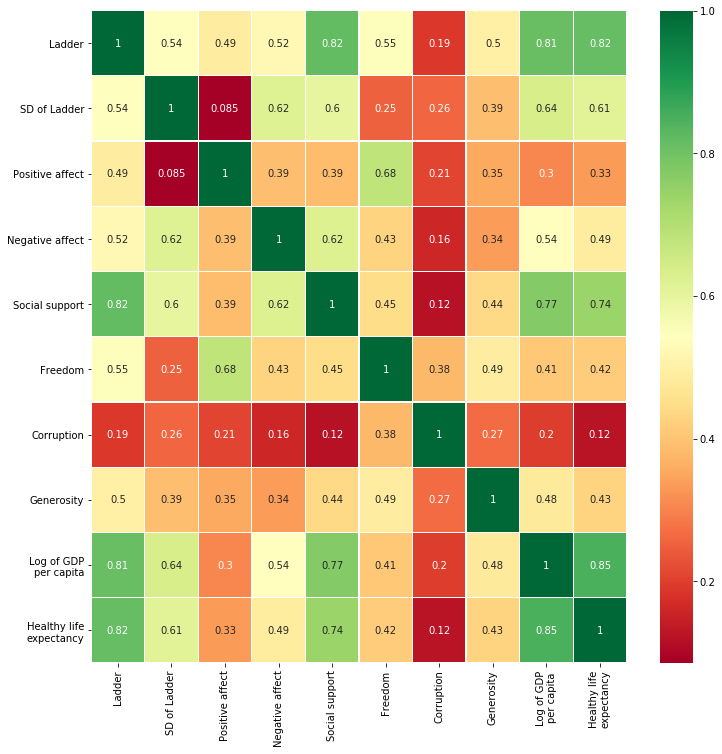

In [82]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо:

In [83]:
df=pd.read_csv('/Users/marinababanina/Desktop/Documents/Course/Netology/Python для работы с данными/Lectures/Мath&Python/2/data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

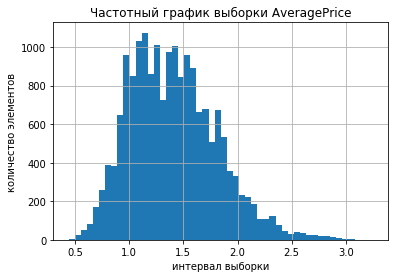

In [86]:
plt.hist(df['AveragePrice'],50)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки AveragePrice')
plt.grid(True)
plt.show()

### Это нормальное распределение с немного скошенным хвостом.

Найти корреляцию в следующих колонках:
колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

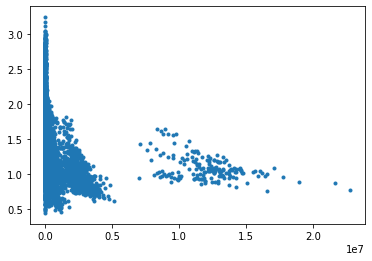

In [87]:
plt.scatter(df['4046'], df['AveragePrice'], marker='.')

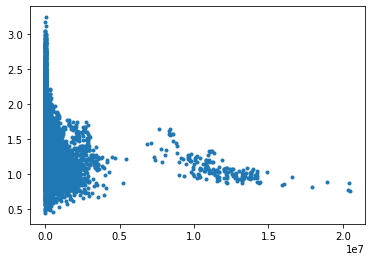

In [88]:
plt.scatter(df['4225'], df['AveragePrice'], marker='.')

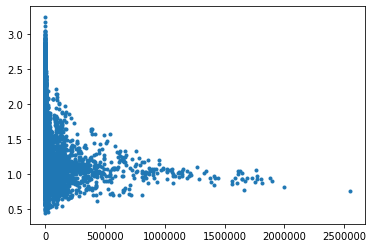

In [89]:
plt.scatter(df['4770'], df['AveragePrice'], marker='.')

In [90]:
df1 = df[['4770', '4225', '4046', 'AveragePrice']]

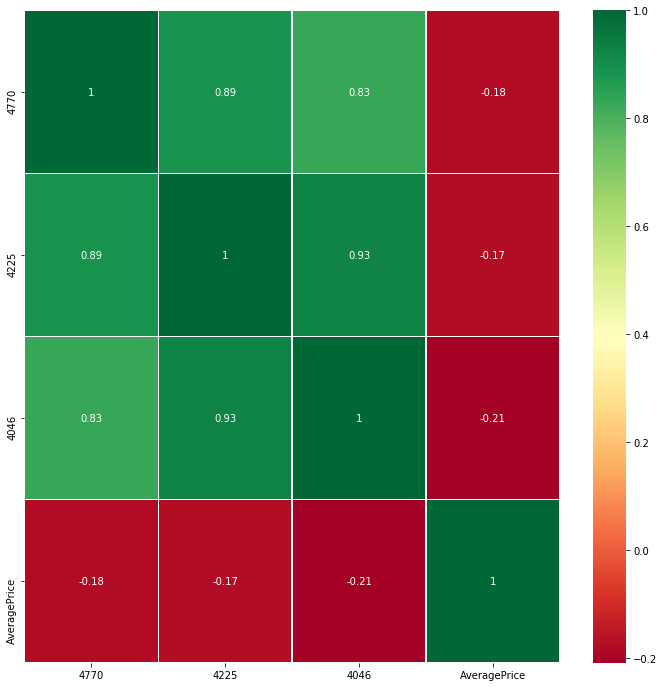

In [91]:
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Между 4770, 4225, 4046 и AveragePrice слабая обратная взаимосвязь. С ростом AveragePrice 4770, 4225, 4046 будут падать.  
При этом между 4770, 4225, 4046 сильная прямая связь, с ростом одной величины - будет расти вторая.